## Objective
The primary goal of this project is to leverage machine learning techniques to 
build a classification model that can accurately identify the species of iris flowers based on their measurements.
The model aims to automate the classification process, offering a practical solution for identifying iris species

## Code

In [69]:




import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB





In [70]:
df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


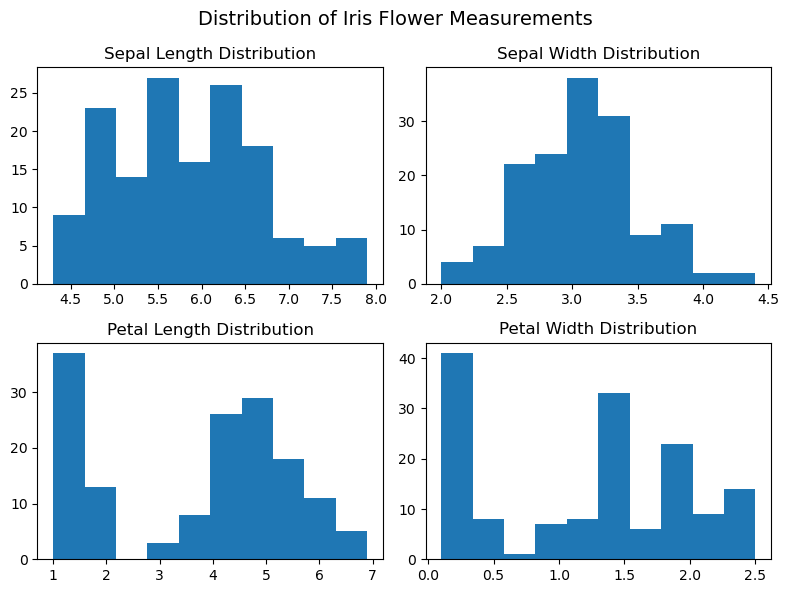

In [72]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)


plt.subplot(2, 2, 1)  
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4) 
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout()  
plt.show()


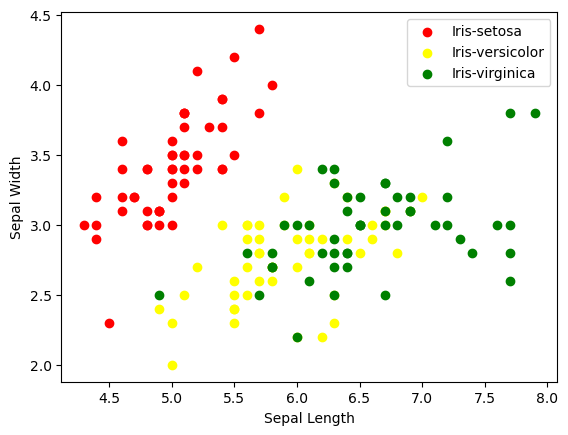

In [73]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
   
    x = df[df['Species'] == species[i]]

   
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')


plt.legend()


plt.show()


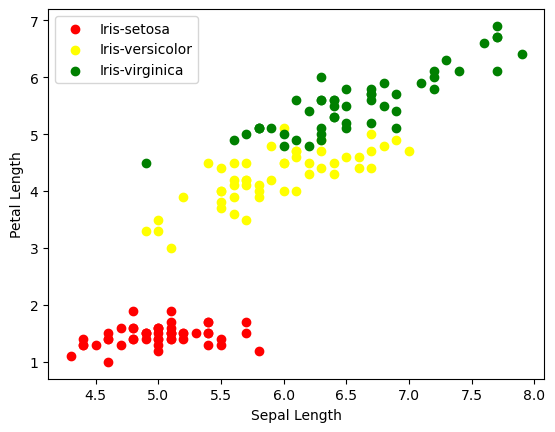

In [74]:
for i in range(3):
 
    x = df[df['Species'] == species[i]]

    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')


plt.legend()

plt.show()


In [76]:
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])


unique_species = df['Species'].unique()


print("Encoded Species Values:")
print(unique_species) 




Encoded Species Values:
[0 1 2]


In [77]:
x=df.drop(columns=['Species'], axis=1)
y=df['Species']


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

y_train.value_counts()


Species
1    39
2    35
0    31
Name: count, dtype: int64

In [79]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, y_train)

   
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

 
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
  
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
  

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])



Confusion Matrix:


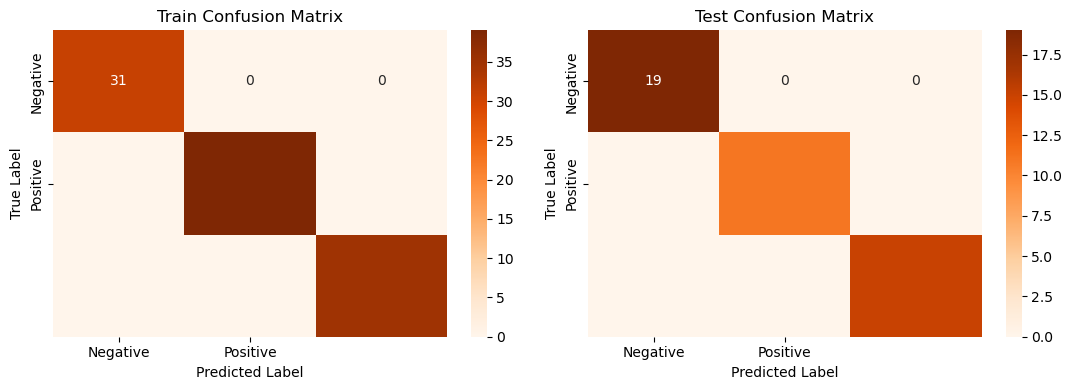


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [80]:
rf_model = RandomForestClassifier(random_state=0)

rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)



In [81]:
score['Random Forest'] = rf_score

In [82]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

rf = RandomForestClassifier(random_state=0)


rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)


random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)


random_search.fit(x_train, y_train)


best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)


rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 8}



Confusion Matrix:


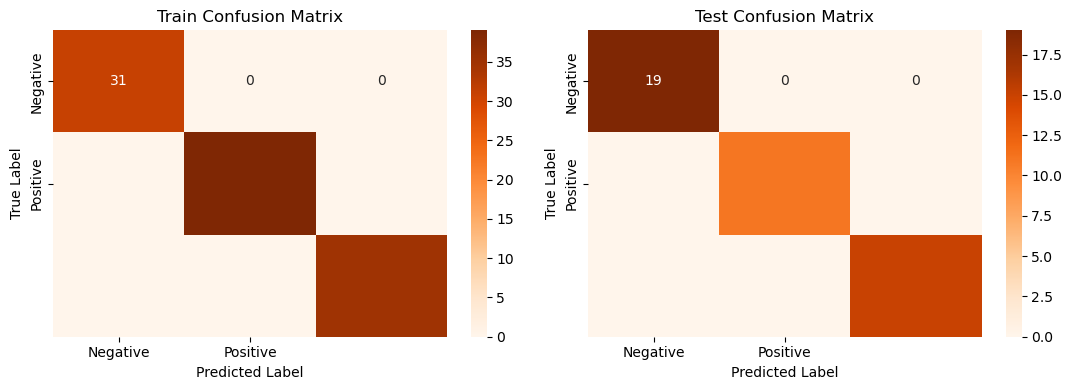


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [83]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [84]:
score['Random Forest tuned'] = rf2_score

## Conclusion
In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model
to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights 
into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and
reliable classification models in the future.